# Load the relabeled calsses, pcs and v_exp of the climo data

In [42]:
import xarray as xr
# import numpy as np

data_dir = 'D:/VScode/Last_deglaciation/climo_ana_data'
ds_sat = xr.open_dataset(data_dir + '/ds_GMM_climo_relabeled.nc')

# # load relabeled_weighted_avg.pkl
# import pickle
# with open(data_dir + '/relabeled_weighted_avg.pkl', 'rb') as f:
#     relabeled_weighted_avg = pickle.load(f)

# Load the weighted average from the ensemble data

In [43]:
# read the all_weighted_avg_curves
import pickle
with open('ens_ana_data/all_weighted_avg_curves_checked.pkl', 'rb') as f:
    all_weighted_avg_curves = pickle.load(f)

# Calculate the mean and the std of each class

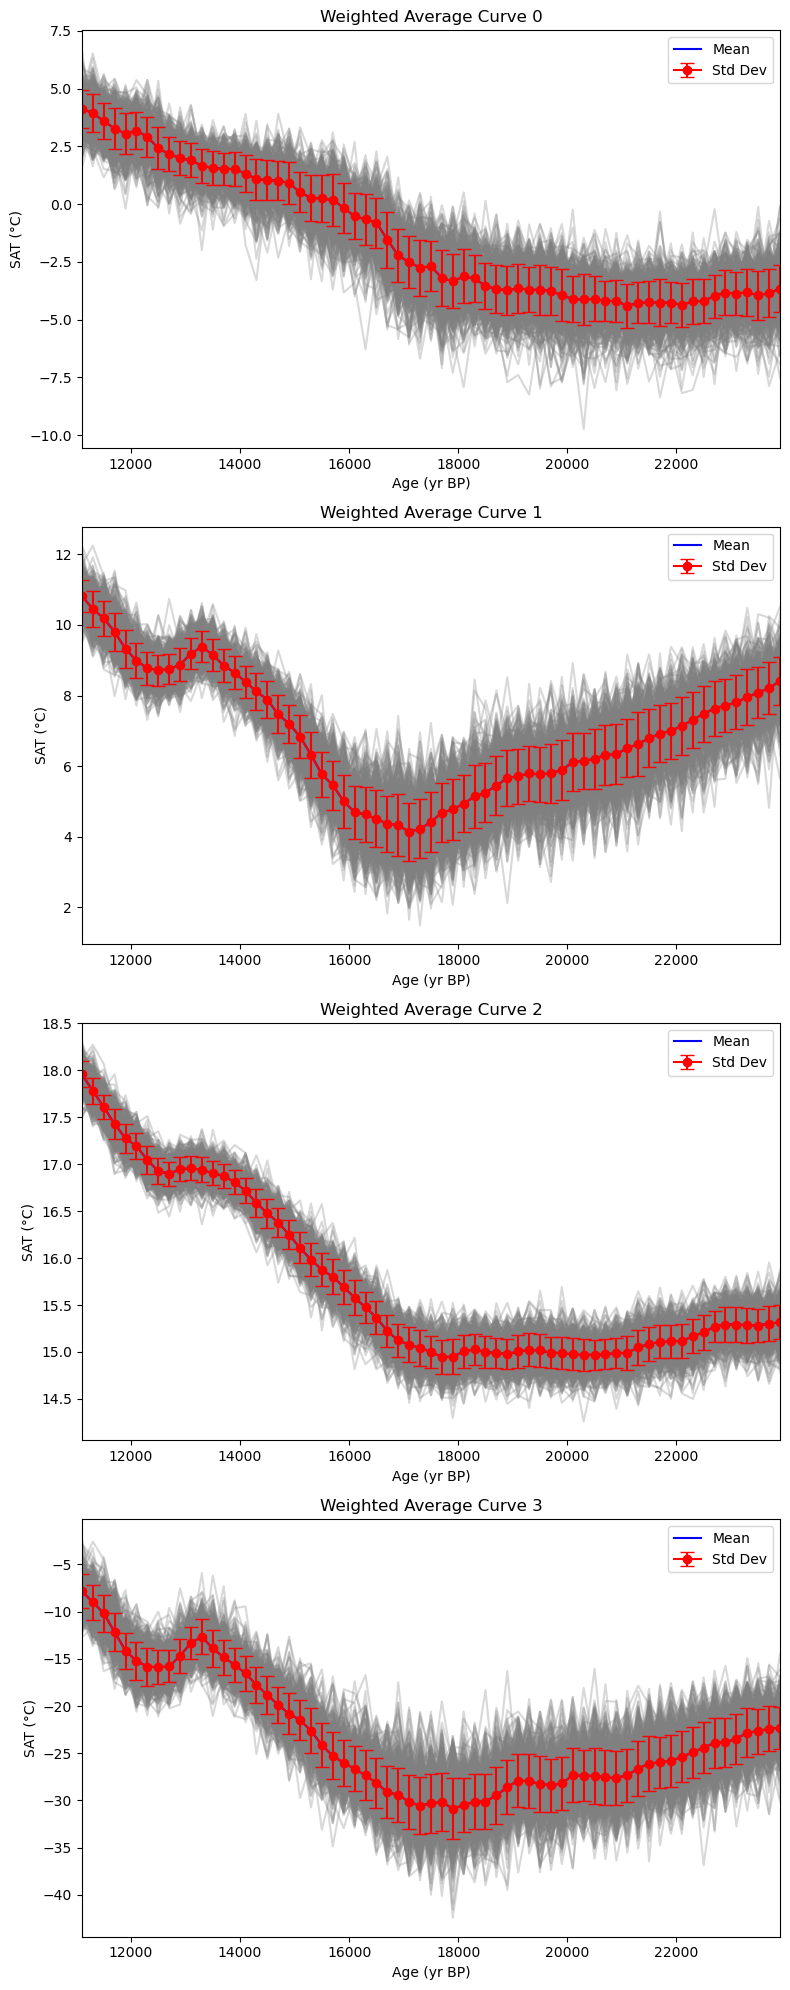

{0: {'mean': array([ 4.1207557 ,  3.9530017 ,  3.5918286 ,  3.2748342 ,  3.0505383 ,
        3.1837823 ,  2.914335  ,  2.429323  ,  2.1608386 ,  1.9980386 ,
        1.8960581 ,  1.6639237 ,  1.5670156 ,  1.5292583 ,  1.5219866 ,
        1.3260194 ,  1.0876334 ,  1.0371765 ,  1.0216734 ,  0.919951  ,
        0.5112987 ,  0.27523872,  0.24933556,  0.18128502, -0.15319836,
       -0.52165586, -0.6605168 , -0.799418  , -1.5373243 , -2.2174764 ,
       -2.5091465 , -2.7518141 , -2.6832588 , -3.191113  , -3.3364725 ,
       -3.1260526 , -3.211378  , -3.5435023 , -3.6648564 , -3.7276454 ,
       -3.6361804 , -3.701226  , -3.7046847 , -3.7535355 , -3.9417827 ,
       -4.10583   , -4.1228147 , -4.0965486 , -4.1878    , -4.18903   ,
       -4.4003954 , -4.273979  , -4.247142  , -4.25603   , -4.2627115 ,
       -4.355454  , -4.207169  , -4.188059  , -3.9760888 , -3.8227394 ,
       -3.8668215 , -3.8162737 , -3.946371  , -3.848827  , -3.6607046 ],
      dtype=float32), 'std_dev': array([0.8178621 

In [44]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

# Set up the figure and GridSpec
fig = plt.figure(figsize=(8, 20))  # Adjust the size as needed
gs = gridspec.GridSpec(4, 1, figure=fig)

# Dictionary to store the statistics for each class
class_stats = {}

# Plot each weighted_avg_curves[i]
for i in range(4):
    # Extract the i-th weighted average curve from each set in all_weighted_avg_curves, if it exists
    weighted_avg_curves_k = [curves[i] for curves in all_weighted_avg_curves if i in curves]

    ax = fig.add_subplot(gs[i, 0])

    # Convert list of numpy arrays to a 2D numpy array for easier manipulation
    curves_array = np.array(weighted_avg_curves_k)

    # Calculate the mean and standard deviation along the ensemble dimension (axis=0)
    mean_curve = np.mean(curves_array, axis=0)
    std_dev = np.std(curves_array, axis=0)

    # Store the statistics in the dictionary
    class_stats[i] = {'mean': mean_curve, 'std_dev': std_dev}

    # Plot each curve in light grey
    for curve in weighted_avg_curves_k:
        ax.plot(ds_sat['age'].values, curve, color='grey', alpha=0.3)  # Lighter color for individual curves

    # Plot the mean curve in blue
    ax.plot(ds_sat['age'].values, mean_curve, color='blue', label='Mean')

    # Add error bars (standard deviation)
    ax.errorbar(ds_sat['age'].values, mean_curve, yerr=std_dev, fmt='-o', color='red', label='Std Dev', capsize=5)

    ax.set_title(f'Weighted Average Curve {i}')
    ax.set_xlabel('Age (yr BP)')  # Assuming 'Index' is the correct x-axis label
    ax.set_ylabel('SAT (°C)')  # Assuming 'Value' is the correct y-axis label
    # Set x-axis range
    ax.set_xlim(np.min(ds_sat['age'].values), np.max(ds_sat['age'].values))
    
    # Add a legend
    ax.legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

# Optionally, print or return the class_stats dictionary
print(class_stats)


# Using Monte Carlo to sample values from the y and x uncertainties

In [53]:
import numpy as np

def generate_monte_carlo_data(class_index, n_iterations, mean_curve, std_dev, ages):
    """
    Generates new time series data by performing Monte Carlo simulations.
    
    Parameters:


    Returns:
        tuple: A tuple containing:
               - A numpy array of generated curves (shape: (n_iterations, len(ages))).
               - A numpy array of new age values for each iteration (shape: (n_iterations, len(ages))).
    """

    # Create empty arrays to store the generated curves and new ages
    generated_curves = np.zeros((n_iterations, len(ages)))
    generated_ages = np.zeros((n_iterations, len(ages)))

    # Monte Carlo simulation to generate new curves
    for i in range(n_iterations):
        # Randomly sample new mean values within the range [mean-std, mean+std]
        new_mean = np.random.uniform(mean_curve - std_dev, mean_curve + std_dev, size=len(ages))
        
        # Randomly sample new ages within the range [age-100, age+100]
        new_age = np.random.uniform(ages - 100, ages + 100, size=len(ages))
        
        # Store the generated curve and new age
        generated_curves[i, :] = new_mean
        generated_ages[i, :] = new_age

    return generated_curves, generated_ages



Text(0, 0.5, 'SAT (°C)')

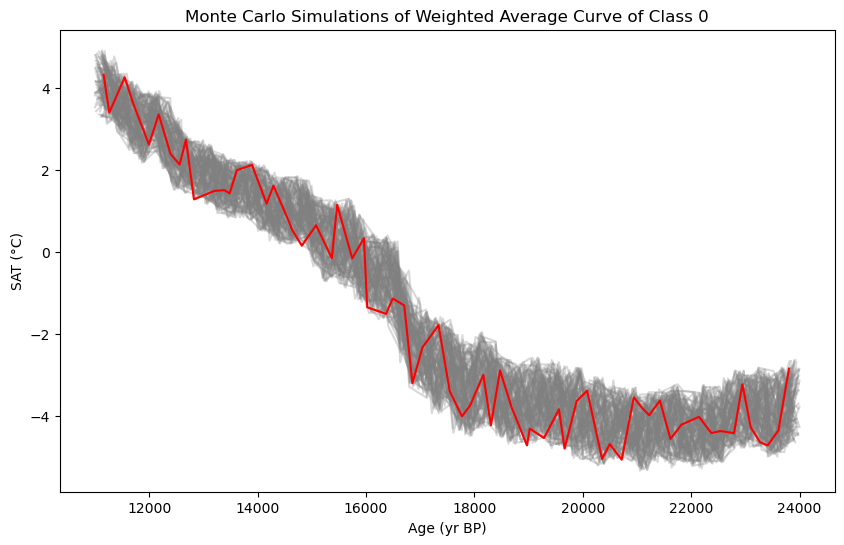

In [54]:


curves_c0, new_ages_c0 = generate_monte_carlo_data(class_index=0, n_iterations=100, mean_curve=class_stats[0]['mean'], std_dev=class_stats[0]['std_dev'], ages=ds_sat['age'].values)

# plot the new ages and curves, note the age and curve are one-to-one correspondence
fig, ax = plt.subplots(figsize=(10, 6))
for i, curve in enumerate(curves_c0):
    ax.plot(new_ages_c0[i], curve, color='grey', alpha=0.3)
# plot the first curve in red
ax.plot(new_ages_c0[0], curves_c0[0], color='red', label='First Curve')
ax.set_title('Monte Carlo Simulations of Weighted Average Curve of Class 0')
ax.set_xlabel('Age (yr BP)')
ax.set_ylabel('SAT (°C)')

\Progress:100.0% done[==============================================================]
pospr_diff_max_index: 32
cps [ 5. 16. 27. 33. 40. 48.]
selected_cp_index: 3
|Progress:100.0% done[==============================================================]
pospr_diff_max_index: 22
cps [13. 25. 36.]
selected_cp_index: 1
/Progress:100.0% done[==============================================================]
pospr_diff_max_index: 31
cps [ 8. 17. 32. 37.]
selected_cp_index: 2
-Progress:100.0% done[==============================================================]
pospr_diff_max_index: 40
cps [ 8. 16. 30. 37. 41. 45.]
selected_cp_index: 4
\Progress:100.0% done[==============================================================]
pospr_diff_max_index: 34
cps [ 4. 10. 20. 25. 31. 35.]
selected_cp_index: 5
|Progress:100.0% done[==============================================================]
pospr_diff_max_index: 24
cps [ 7. 18. 26. 40.]
selected_cp_index: 2
/Progress:100.0% done[==================================

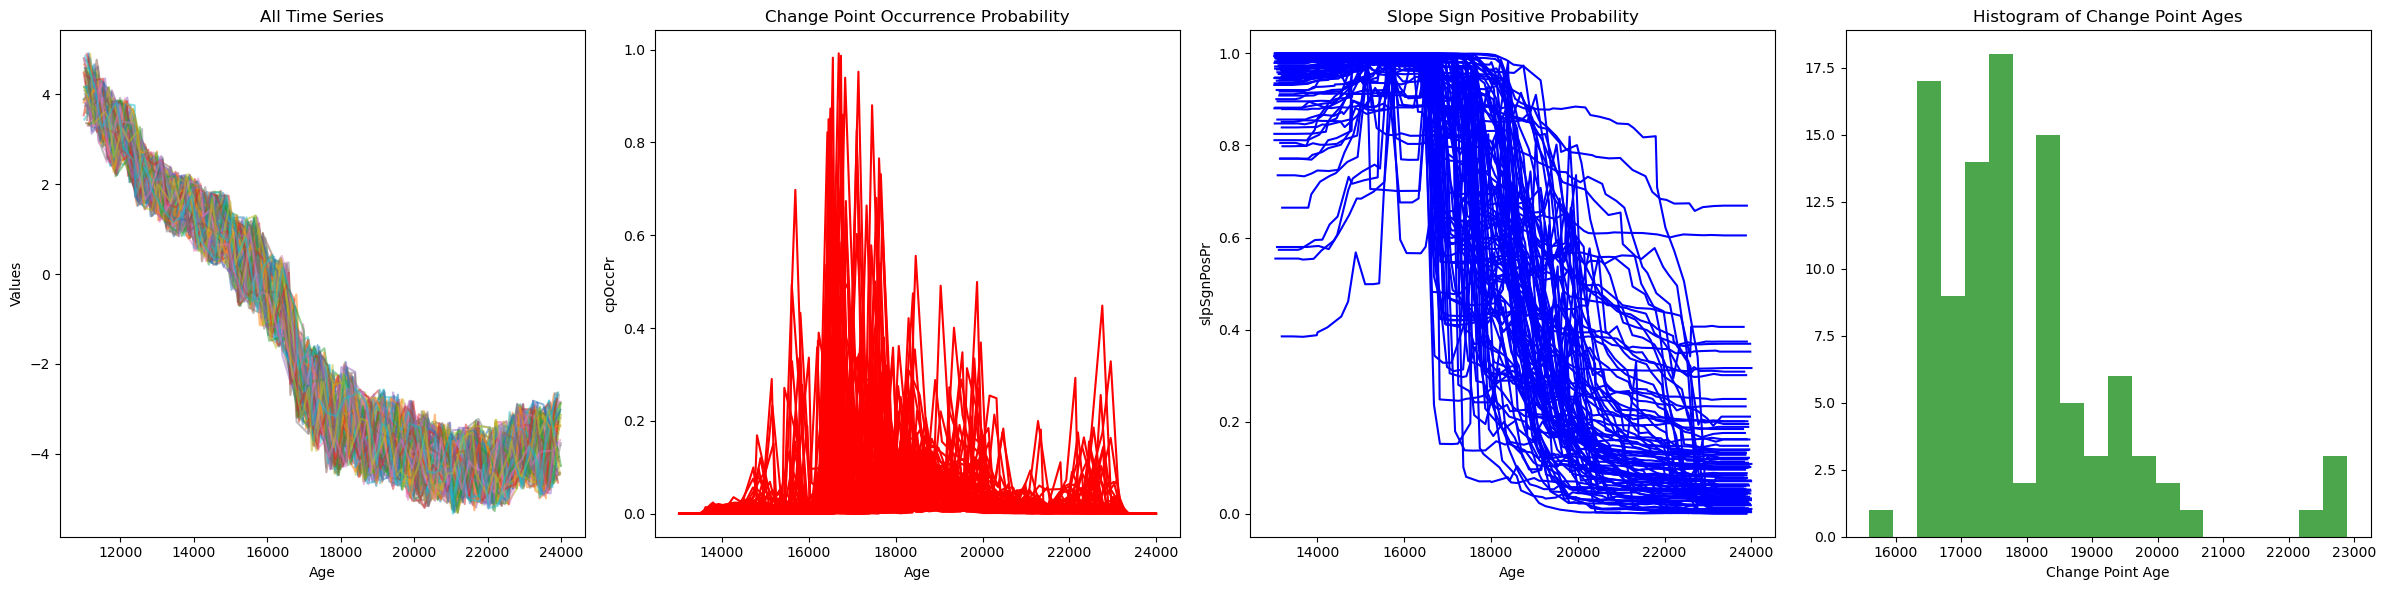

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from toolbox import change_point_functions as cpf

all_arrays = curves_c0

# Initialize a list to store cp_age values
cp_ages = []

# Creating a figure with 1 row and 4 columns to accommodate the new histogram plot
fig, ax = plt.subplots(1, 4, figsize=(24, 6))  # Increased width to better fit four subplots

# Loop through all arrays
for i, array in enumerate(all_arrays):
    # Calculate the cp_info for each dataset
    cp_info = cpf.find_cp(array, new_ages_c0[i, :], rb_plot=False)
    
    # Extract data for plotting from cp_info
    data_flipped = cp_info['data_flipped']
    cpOccPr = cp_info['cpOccPr']
    slpSgnPosPr = cp_info['slpSgnPosPr']
    age = cp_info['age']
    cp_age = cp_info['cp_age']

    # Store cp_age in the list using append
    cp_ages.append(cp_age)  # Corrected to append for a single float value
    
    # Plot all arrays in the first subplot
    ax[0].plot(new_ages_c0[i, :], array, alpha=0.5)  # using alpha for better visibility if lines overlap
    ax[1].plot(age, cpOccPr, 'r-')  # Red line for visibility
    ax[2].plot(age, slpSgnPosPr, 'b-')  # Blue line for visibility

# Adding labels and titles to the subplots
ax[0].set_title('All Time Series')
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Values')

ax[1].set_title('Change Point Occurrence Probability')
ax[1].set_xlabel('Age')
ax[1].set_ylabel('cpOccPr')

ax[2].set_title('Slope Sign Positive Probability')
ax[2].set_xlabel('Age')
ax[2].set_ylabel('slpSgnPosPr')

# Plot the histogram of cp_age in the fourth subplot
ax[3].hist(cp_ages, bins=20, color='green', alpha=0.7)
ax[3].set_title('Histogram of Change Point Ages')
ax[3].set_xlabel('Change Point Age')
# ax_3.set_ylabel('Frequency')

# Display the plot
plt.tight_layout()
plt.show()


-Progress:100.0% done[==============================================================]
pospr_diff_max_index: 32
cps [ 5. 16. 27. 33. 40. 48.]
selected_cp_index: 3
\Progress:100.0% done[==============================================================]
pospr_diff_max_index: 22
cps [13. 25. 36.]
selected_cp_index: 1
|Progress:100.0% done[==============================================================]
pospr_diff_max_index: 31
cps [ 8. 17. 32. 37.]
selected_cp_index: 2
/Progress:100.0% done[==============================================================]
pospr_diff_max_index: 40
cps [ 8. 16. 30. 37. 41. 45.]
selected_cp_index: 4
-Progress:100.0% done[==============================================================]
pospr_diff_max_index: 34
cps [ 4. 10. 20. 25. 31. 35.]
selected_cp_index: 5
\Progress:100.0% done[==============================================================]
pospr_diff_max_index: 24
cps [ 7. 18. 26. 40.]
selected_cp_index: 2
|Progress:100.0% done[==================================

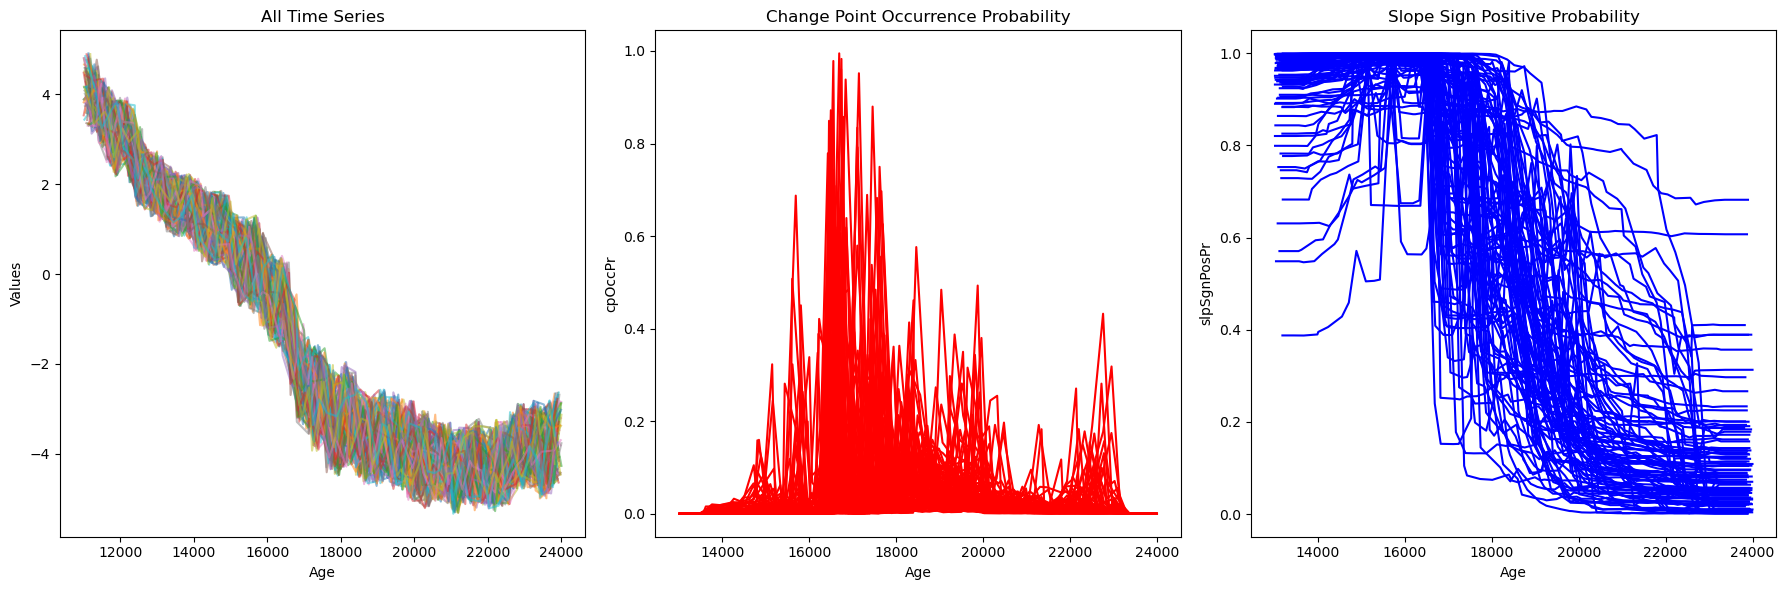

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from toolbox import change_point_functions as cpf



all_arrays = curves_c0

# Creating a figure with 1 row and 3 columns
fig, ax = plt.subplots(1, 3, figsize=(18, 6))  # Increase width to better fit three subplots

# Loop through all arrays
for i, array in enumerate(all_arrays):
    # Calculate the cp_info for each dataset
    cp_info = cpf.find_cp(array, new_ages_c0[i,:], rb_plot=False)
    
    # Extract data for plotting from cp_info
    data_flipped = cp_info['data_flipped']
    cpOccPr = cp_info['cpOccPr']
    slpSgnPosPr = cp_info['slpSgnPosPr']
    age = cp_info['age']
    cp_age = cp_info['cp_age']
    
    # Plot all arrays in the first subplot
    ax[0].plot(new_ages_c0[i,:], array, alpha=0.5)  # using alpha for better visibility if lines overlap
    ax[1].plot(age, cpOccPr, 'r-')  # Red line for visibility
    ax[2].plot(age, slpSgnPosPr, 'b-')  # Blue line for visibility

# Adding labels and titles to the first subplot
ax[0].set_title('All Time Series')
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Values')

# Only plot the last iteration's 'cpOccPr' and 'slpSgnPosPr' to avoid overlapping and cluttering
# Plotting cpOccPr in the middle subplot

ax[1].set_title('Change Point Occurrence Probability')
ax[1].set_xlabel('Age')
ax[1].set_ylabel('cpOccPr')

# Plotting slpSgnPosPr in the third subplot
ax[2].set_title('Slope Sign Positive Probability')
ax[2].set_xlabel('Age')
ax[2].set_ylabel('slpSgnPosPr')

# Display the plot
plt.tight_layout()
plt.show()


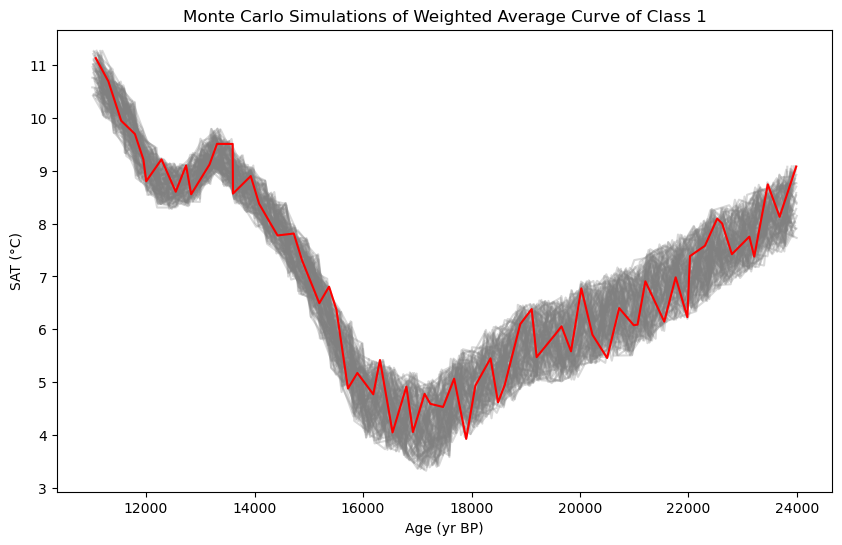

In [55]:
# do the same for the class1
curves_c1, new_ages_c1 = generate_monte_carlo_data(class_index=1, n_iterations=100, mean_curve=class_stats[1]['mean'], std_dev=class_stats[1]['std_dev'], ages=ds_sat['age'].values)

# plot the new ages and curves, note the age and curve are one-to-one correspondence
fig, ax = plt.subplots(figsize=(10, 6))
for i, curve in enumerate(curves_c1):
    ax.plot(new_ages_c1[i], curve, color='grey', alpha=0.3)
# plot the first curve in red
ax.plot(new_ages_c1[0], curves_c1[0], color='red', label='First Curve')
ax.set_title('Monte Carlo Simulations of Weighted Average Curve of Class 1')
ax.set_xlabel('Age (yr BP)')
ax.set_ylabel('SAT (°C)')
plt.show()

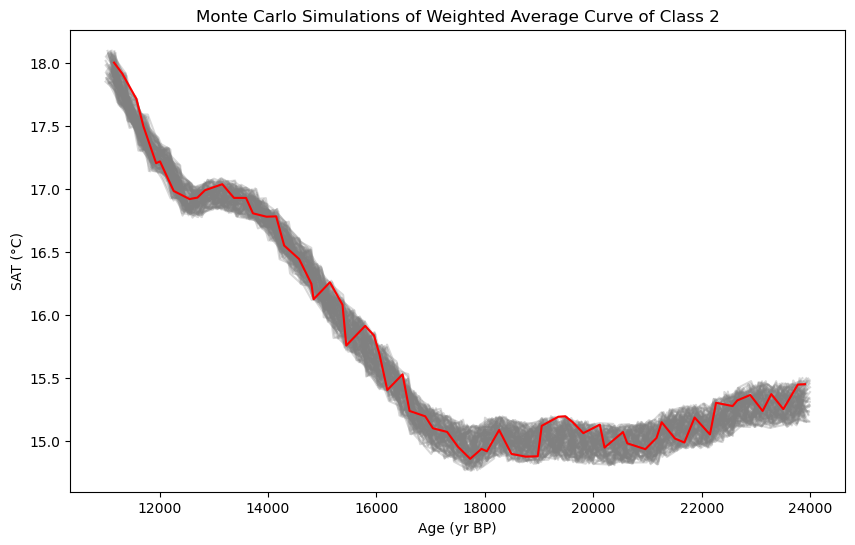

In [56]:
# do the same for the class2
curves_c2, new_ages_c2 = generate_monte_carlo_data(class_index=2, n_iterations=100, mean_curve=class_stats[2]['mean'], std_dev=class_stats[2]['std_dev'], ages=ds_sat['age'].values)

# plot the new ages and curves, note the age and curve are one-to-one correspondence
fig, ax = plt.subplots(figsize=(10, 6))
for i, curve in enumerate(curves_c2):
    ax.plot(new_ages_c2[i], curve, color='grey', alpha=0.3)
# plot the first curve in red
ax.plot(new_ages_c2[0], curves_c2[0], color='red', label='First Curve')
ax.set_title('Monte Carlo Simulations of Weighted Average Curve of Class 2')
ax.set_xlabel('Age (yr BP)')
ax.set_ylabel('SAT (°C)')
plt.show()

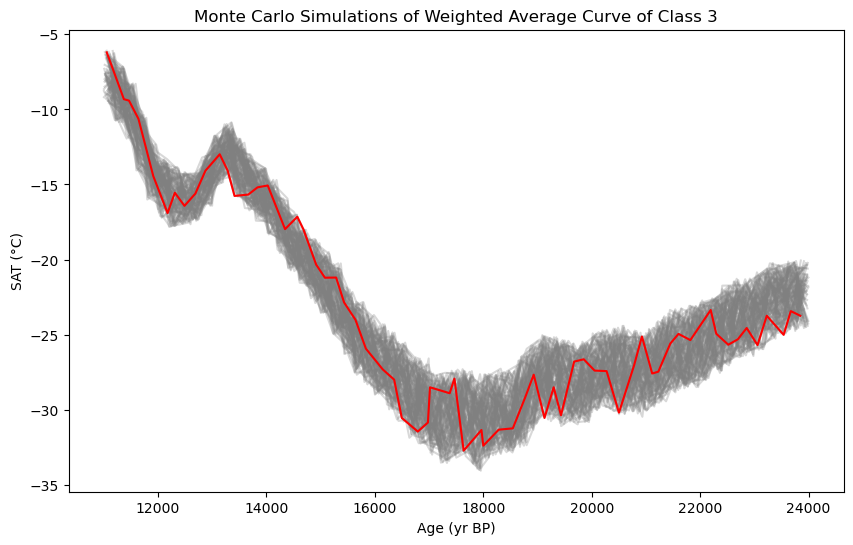

In [57]:
# do the same for the class3
curves_c3, new_ages_c3 = generate_monte_carlo_data(class_index=3, n_iterations=100, mean_curve=class_stats[3]['mean'], std_dev=class_stats[3]['std_dev'], ages=ds_sat['age'].values)

# plot the new ages and curves, note the age and curve are one-to-one correspondence
fig, ax = plt.subplots(figsize=(10, 6))
for i, curve in enumerate(curves_c3):
    ax.plot(new_ages_c3[i], curve, color='grey', alpha=0.3)
# plot the first curve in red
ax.plot(new_ages_c3[0], curves_c3[0], color='red', label='First Curve')
ax.set_title('Monte Carlo Simulations of Weighted Average Curve of Class 3')
ax.set_xlabel('Age (yr BP)')
ax.set_ylabel('SAT (°C)')
plt.show()

# Load TraCE data

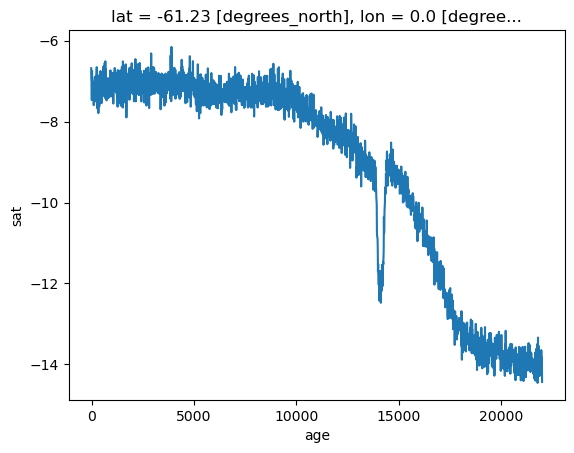

In [7]:
import xarray as xr

# import .nc data
ds = xr.open_dataset('TraCE_data/trace.01-36.22000BP.cam2.TREFHT.22000BP_decavg_400BCE.nc')

# rename the TREFHT to sat
ds = ds.rename({'TREFHT': 'sat'})
# rename the time to age
ds = ds.rename({'time': 'age'})
# multiply age by 1000
ds['age'] = ds['age'] * -1000

# convert the sat to degrees C
ds['sat'] = ds['sat'] - 273.15

ds = ds[['sat']]

ds_trace=ds

ds_trace['sat'].isel(lat=7, lon=0).plot()


In [5]:
# read the TraCE_weighted_avg_LGMR_mask.pkl
import pickle
with open('data_fig2/TraCE_weighted_avg_LGMR_mask.pkl', 'rb') as f:
    TraCE_weighted_avg_LGMR_mask = pickle.load(f)

# Plot

|Progress:100.0% done[==============================================================]
pospr_diff_max_index: 13
cps [15. 25. 30. 37. 45.]
selected_cp_index: 0
age_CI_text: 21975-20355
/Progress:100.0% done[==============================================================]
pospr_diff_max_index: 33
cps [14. 23. 33. 40. 48.]
selected_cp_index: 2
age_CI_text: 17636-16737
-Progress:100.0% done[==============================================================]
pospr_diff_max_index: 33
cps [ 7. 14. 34. 51.]
selected_cp_index: 2
age_CI_text: 17493-16587
\Progress:100.0% done[==============================================================]
pospr_diff_max_index: 34
cps [17. 26. 35. 42.]
selected_cp_index: 2
age_CI_text: 17370-16504


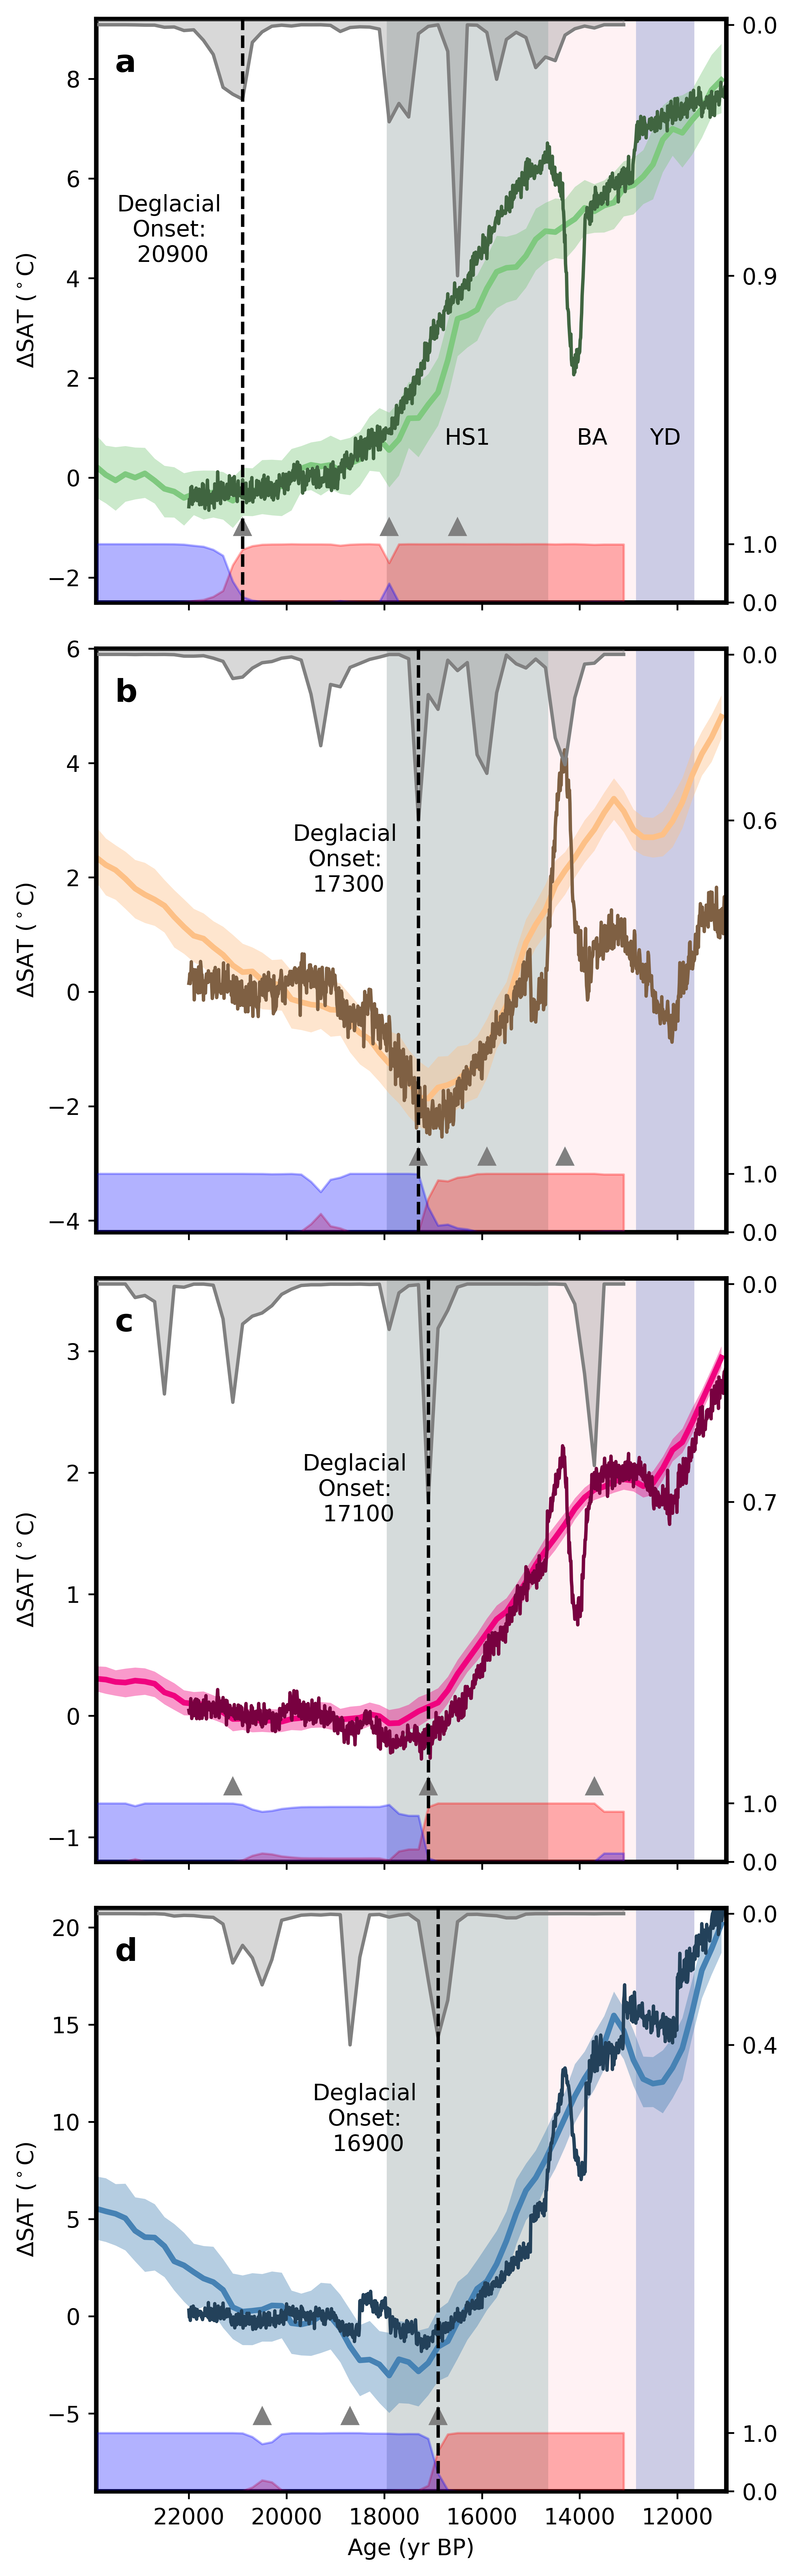

In [23]:
import importlib
import numpy as np
import matplotlib.pyplot as plt
from toolbox import change_point_functions as cpf
importlib.reload(cpf)
from matplotlib.colors import ListedColormap



# Create a figure with 4 rows and 1 column
fig, axs = plt.subplots(4, 1, figsize=(5, 16),dpi=600,sharex=True)
# cmap = plt.get_cmap('Accent', 4)

if len(all_weighted_avg_curves[0]) <= 4:
    custom_colors = [
    (0.4980392156862745, 0.788235294117647, 0.4980392156862745),
    (0.9921568627450981, 0.7529411764705882, 0.5254901960784314),
    (0.9411764705882353, 0.00784313725490196, 0.4980392156862745),
    (0.27450980392156865, 0.5098039215686274, 0.7058823529411765),]

    # Create a ListedColormap object with your custom colors
    cmap = ListedColormap(custom_colors)   
else:
    cmap = plt.get_cmap('Accent', len(all_weighted_avg_curves[0]))


custom_colors_1=[(0.24901960784313726, 0.3941176470588235, 0.24901960784313726),
 (0.49607843137254903, 0.3764705882352941, 0.2627450980392157),
 (0.47058823529411764, 0.00392156862745098, 0.24901960784313726),
 (0.13725490196078433, 0.2549019607843137, 0.35294117647058826)]

# Create a ListedColormap object with your custom colors
cmap1 = ListedColormap(custom_colors_1)


# Add climate transitions timing
HS1 = np.array([18000, 14692]) - 50  # convert to b1950
BA = np.array([14692, 12896]) - 50
YD = np.array([12896, 11703]) - 50

ylims=[[-2.5,9.2],[-4.2,6],[-1.2,3.6],[-9,21]]

# Loop through the range 0 to 3
for i in range(4):

    
    # Get the current axis
    ax1 = axs[i]


    weighted_avg_curves_k = [curves[i] for curves in all_weighted_avg_curves if i in curves]

    
    # loop through each data in weighted_avg_curves_k and calculate the mean between index 35 to 54 (correpsonding to 18100 to 21000 BP)
    for j in range(len(weighted_avg_curves_k)):
        data=weighted_avg_curves_k[j]
        data_18100_21000=np.mean(data[35:55])
        data=data-data_18100_21000
        weighted_avg_curves_k[j]=data
    

    # calculate the 5th, 25th, 75th and 95th percentile of the weighted_avg_curves_k
    weighted_avg_curves_k_5th=np.percentile(weighted_avg_curves_k,5,axis=0)
    weighted_avg_curves_k_25th=np.percentile(weighted_avg_curves_k,25,axis=0)
    weighted_avg_curves_k_75th=np.percentile(weighted_avg_curves_k,75,axis=0)
    weighted_avg_curves_k_95th=np.percentile(weighted_avg_curves_k,95,axis=0)


    # calculate the median of the weighted_avg_curves_k
    weighted_avg_curves_k_median=np.median(weighted_avg_curves_k,axis=0)

    # Calculate the cp_info for the median of each dataset
    cp_info = cpf.find_cp(weighted_avg_curves_k_median, ds_sat['age'].values, rb_plot=False)
    
    # Extract data for plotting from cp_info
    # data_flipped = cp_info['data_flipped']
    cpOccPr = cp_info['cpOccPr']
    slpSgnPosPr = cp_info['slpSgnPosPr']
    age = cp_info['age']
    cp_age = cp_info['cp_age']
    cp_age_CI=cp_info['cp_age_CI']
    cp_age_all=cp_info['cp_age_all']






    ax1.set_ylim(ylims[i])

    # Plot grey bars for HS1, BA, and YD periods
    ax1.axvspan(HS1[1], HS1[0], color='darkslategray', alpha=0.2, lw=0)
    ax1.axvspan(BA[1], BA[0], color='pink', alpha=0.2, lw=0)
    ax1.axvspan(YD[1], YD[0], color='navy', alpha=0.2, lw=0)


    # plot triangles at x=cp_age_all and y=np.min(ax1.get_ylim())+0.2 * (np.max(ax1.get_ylim())-np.min(ax1.get_ylim()))
    ax1.plot(cp_age_all, np.min(ax1.get_ylim())+0.129 * (np.max(ax1.get_ylim())-np.min(ax1.get_ylim())) * np.ones_like(cp_age_all), marker='^', markersize=7, color='grey', linestyle='None')
    # ax1.plot(cp_age, np.min(ax1.get_ylim())+0.129 * (np.max(ax1.get_ylim())-np.min(ax1.get_ylim())) * np.ones_like(cp_age), marker='^', markersize=7, color='k', linestyle='None')

    if i==0:
        ax1.text(x=np.mean(HS1), y=np.min(ax1.get_ylim())+0.3 * (np.max(ax1.get_ylim())-np.min(ax1.get_ylim())), s='HS1', ha='center', va='top')
        ax1.text(x=np.mean(BA), y=np.min(ax1.get_ylim())+0.3 * (np.max(ax1.get_ylim())-np.min(ax1.get_ylim())), s='BA', ha='center', va='top')
        ax1.text(x=np.mean(YD), y=np.min(ax1.get_ylim())+0.3 * (np.max(ax1.get_ylim())-np.min(ax1.get_ylim())), s='YD', ha='center', va='top')


    # fill the area betwen 5th and 95th percentile with light grey with alpha=0.3, hide the line
    # ax1.fill_between(ds_sat['age'].values,weighted_avg_curves_k_5th,weighted_avg_curves_k_95th,color=cmap(i),alpha=0.15,linewidth=0)

    # fill the area between 25th and 75th percentile with light blue with alpha=0.5
    ax1.fill_between(ds_sat['age'].values,weighted_avg_curves_k_25th,weighted_avg_curves_k_75th,color=cmap(i),alpha=0.4,linewidth=0)



    ax1.plot(ds_sat['age'], weighted_avg_curves_k_median, color=cmap(i),linewidth=2.5)

    # # interpolate the ds_sat['age'], weighted_avg_curves_k_median at age=21000
    # LGMR_base=np.interp(21000, ds_sat['age'], weighted_avg_curves_k_median)
    # ax1.plot(ds_sat['age'], weighted_avg_curves_k_median-LGMR_base, color=cmap(i),linewidth=2.5)

    # calculate the mean of traces between 18000 to 22000 BP (index 0 to 400)
    TraCE_base=np.mean(TraCE_weighted_avg_LGMR_mask[i][0:401])
    # Plot TraCE data, relative to 21000 BP    
    ax1.plot(ds_trace['age'], (TraCE_weighted_avg_LGMR_mask[i]-TraCE_base)*1.6, color=cmap1(i),linewidth=1.5,linestyle='-')
    


    if i==3:
        ax1.set_xlabel('Age (yr BP)')
    # set x-axis limits
    ax1.set_xlim([11000,23900])


    # invert the x-axis
    ax1.invert_xaxis()
    # Make the y-axis label and tick labels match the line color.
    ax1.set_ylabel('ΔSAT ($^\circ$C)', color='k')
    
    ax1.spines['left'].set_linewidth(2)
    ax1.spines['bottom'].set_linewidth(2)
    ax1.spines['right'].set_linewidth(2)
    ax1.spines['top'].set_linewidth(2)





    # Create a twin axis
    ax2 = ax1.twinx()
    # set the y-axis limits
    ax2.set_ylim([0, 10])
    # get the ylim
    ylim = ax2.get_ylim()



    # fill the areas under slpSgnPosPr and 1-slpSgnPosPr to light red and light blue respectively
    # ax2.fill_between(age, slpSgnPosPr, color='r', alpha=0.3)
    # ax2.fill_between(age, 1 - slpSgnPosPr, color='b', alpha=0.3)

    ax2.fill_between(age, slpSgnPosPr, color='r', alpha=0.3)
    ax2.fill_between(age, 1 - slpSgnPosPr, color='b', alpha=0.3)



    # Plot the probability of the change points
    scaled_cpOccPr = (np.max(ylim)-cpOccPr*5)-0.1
    ax2.plot(age, scaled_cpOccPr, 'grey', label='cpOccPr')
    
    ax2.fill_between(age, scaled_cpOccPr, np.max(ylim), color='grey', alpha=0.3)

    # set y ticks
    ax2.set_yticks([0, 1, np.min(scaled_cpOccPr),np.max(scaled_cpOccPr)])
    #  set y tick labels
    ax2.set_yticklabels(['0.0', '1.0', str(np.round(np.max(cpOccPr),1)), str(np.round(np.min(cpOccPr),1))])






    # plot a vertical line at cp_age
    ax2.axvline(x=cp_age, color='k', linestyle='--')
    # add text to show the cp_age
    age_text=str(int(cp_age))
    ax2.text(x=cp_age+1500, y=0.7 * np.max(ax2.get_ylim()), s='Deglacial\nOnset:\n '+age_text, ha='center', va='top')
    # add text to show the cp_age_CI
    age_CI_text=str(int(cp_age_CI[0]))+'-'+str(int(cp_age_CI[1]))
    # ax2.text(x=cp_age_CI[0]+800, y=0.6 * np.max(ax2.get_ylim()), s='CP CI: '+age_CI_text, ha='center', va='top')
    print('age_CI_text:',age_CI_text)

    # add a, b, c and d to the subplots
    ax1.text(x=0.03, y=0.95, s=chr(97+i), transform=ax1.transAxes, fontsize=14, fontweight='bold', va='top')

    
    # Adjust layout
    plt.tight_layout()

# Display the figure
plt.show()
